# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [97]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [98]:
np.random.seed(101)

In [99]:
# read in data:
df = pd.read_csv('data/human_body_temperature.csv')

In [100]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


----
##### 1. Is the distribution of body temperatures normal?

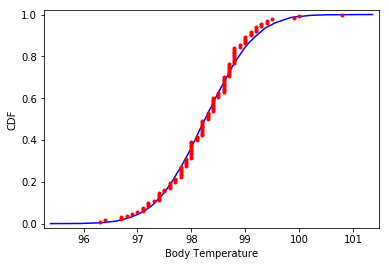

In [102]:
# Overlay a normally-distributed graph with the data you're testing to see if it's normally distributed:

# [WORK HORSE]  Function to Compute the ECDF:
# Write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. 

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y 

# Compute mean and standard deviation: mu, sigma
x_bar = np.mean(df.temperature)
stand_error = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(x_bar, stand_error, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df.temperature)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor, color ='b')
_ = plt.plot(x, y, marker='.', linestyle='none', color = 'r')
plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()


In [103]:
# Test if df.temperature is normally distributed:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [104]:
# The blue curve is a normal distribution CDF and the red dotted-curve is the body temperatures' CDF.   
# From the graph and the test, we can see that the distribution of the body temperatures is pretty normal.

----
##### 2. Is the sample size large? Are the observations independent? 
(Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [106]:
# The sample size is 130, so large enough (n > 30) to satisfy the condition for CLT. 

# The observations are independent.

----
##### 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the t or z statistic?
* Now try using the other test. How is the result be different? Why?

In [107]:
# Is the true population mean really 98.6 degrees F?

# We need to do a hypothesis test:
# H0 = mu is 98.6 degrees F
# Ha = mu is not 98.6 degrees F

In [108]:
# Would you use a one-sample or two-sample test? Why?
# I would use a one-sample test since we are comparing one sample's mean to the perceived p

In [109]:
# In this situation, is it appropriate to use the t or z statistic?
# Since the CLT conditions are met, we can use z statistics.

In [114]:
# First, generate 10,000 permutation replicates:

def permutation_sample(data):
    """Generate a permutation sample from a data set."""

    # Permute the concatenated array: permuted_data
    permuted_sample = np.random.choice(data, size=100, replace=False)
     
    return permuted_sample


def draw_perm_reps(data, func, size=1):
    """Generate permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample = permutation_sample(data)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample)

    return perm_replicates

In [115]:
# According to CLT, np.mean(perm_mean) -> true population mean 'mu'
perm_mean = draw_perm_reps(df.temperature, np.mean, 10000)

In [116]:
# Using a z-test:
from statsmodels.stats.weightstats import ztest
ztest(perm_mean, value=98.6)
# test statisic = -1000.3, pvalue = 0

(-1000.3417358676354, 0.0)

In [117]:
# Now try using the other test. How is the result be different? Why?
# Using a t-test:
stats.ttest_1samp(perm_mean, 98.6)

Ttest_1sampResult(statistic=-1000.3417358676354, pvalue=0.0)

In [ ]:
# Both tests have 0 (or very small) p-values, so we should reject the null hypothese and conclude that
# the true population mean of body temperature (mu) is not 98.6 degrees F.

----
##### 4. Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [118]:
def permutation_sample(data):
    """Generate a permutation sample from a data set."""

    # Permute the concatenated array: permuted_data
    permuted_sample = np.random.choice(data, size=10, replace=False)
     
    return permuted_sample


def draw_perm_reps(data, func, size=1):
    """Generate permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample = permutation_sample(data)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample)

    return perm_replicates

In [119]:
# np.mean(perm_mean) -> true population mean 'mu'
perm_mean = draw_perm_reps(df.temperature, np.mean, 10000)

In [120]:
# z test:
ztest(perm_mean, value=98.6)
# test statisic = -159.13, pvalue = 0.00010989

(-159.13194295720143, 0.0)

In [121]:
# t test:
stats.ttest_1samp(perm_mean, 98.6)

Ttest_1sampResult(statistic=-159.13194295720143, pvalue=0.0)

In [122]:
# Which one is the correct one to use?
# Since n=10 <30, CLT does not hold anymore. Thus, t test is the correct one to use.

In [123]:
# What do you notice? What does this tell you about the difference in application of the t and z statistic?

# The t-test and z-test statistics become a lot smaller when n=10 compared to when n=130. 
# It tells me that when we're using CLT to infer about the population mean, using t test or z test gives 
# similar results.


----
##### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

In [124]:
# SEM (standard error of the mean):
sem = np.std(df.temperature) / np.sqrt(len(df.temperature)) 
# MOE (margin of error):
# Margin of error = Critical value x Standard error of the statistic (standard error of the mean in our case)
moe = 1.96 * sem
moe

0.12555096480257899

In [125]:
# 95% Confidence intervals (CI)
conf_int = [x_bar - moe, x_bar + moe]
conf_int

[98.123679804428193, 98.374781734033363]

In [126]:
# If someone's temperature is out of this range, then we should consider that temperature to be "abnormal".

----
##### 6. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [127]:
female = df.temperature[df.gender=='F']
male = df.temperature[df.gender=='M']

In [128]:
# What test did you use and why?
# I use a two-sided t-test becasue we have two independent samples (female and male) and 
# we want to test whether they have the same mean value. 

# H0 = the mean of female body temperature is the same as the mean of the male body temperature
# Ha = the mean of female body temperature is not the same as the mean of the male body temperature

stats.ttest_ind(female, male)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [129]:
# The p-value is 0.02393, which is less than 0.05. Thus, we reject the null hypothesis and conclude that 
# the mean of female body temperature is not the same as the mean of the male body temperature.

In [130]:
# Write a story with your conclusion in the context of the original problem.

# At the beginning of this exercise, Carl Wunderlich in his famous 1868 book states that "The mean normal 
# body temperature was held at 98.6 F". Now we know that this value cannot be statistically correct since 
# the mean of female body temperature is statistically different from the mean of the male body temperature.